# 7.Proje: Netflix İçerik Bilgileri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [16]:
df["title"].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

 Verimizin değerleri ile alakalı:
 
*Ya film yada tvshowu tipi olduğu,

*En çok filmi olan yönetmen: Rajiv Chilaka

*En çok tekrar eden cast: David Attenborough

*En çok Show olan ülke: United States

*En çok fil  eklenen tarih: January 1, 2020

*En çok çıkış yapılan yıl: 2018

*En çok yetişkinlere özgü içrikler var: TV-MA-3207

*Genellikle bir sezon süzen içerikler var.

*En fazla içerik konusu: Dramas, International Movies

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
# Biz bu veride film içeirklerine göre kümeleme yapacağız o sebeple boş verileri silebilriz.
df = df.dropna(subset=['director', 'cast', 'country', 'date_added', 'rating', 'duration'])

In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Veri Analizi ve Görselleştirme:

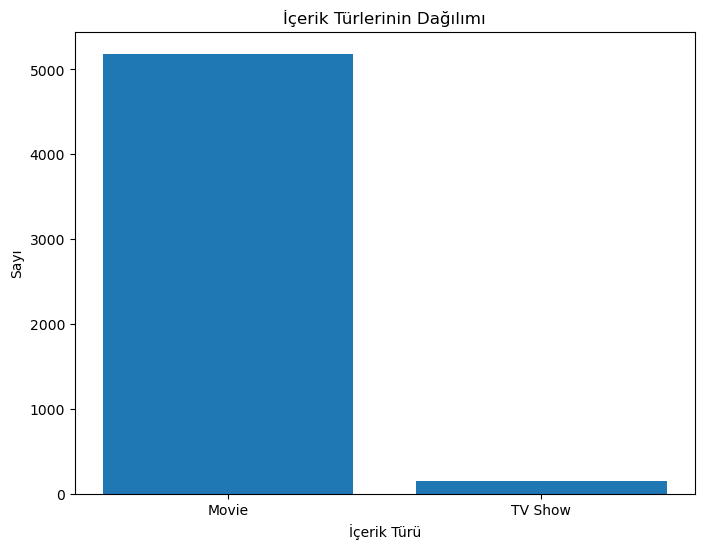

In [21]:
tür_sayısı = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(tür_sayısı.index, tür_sayısı.values)
plt.xlabel('İçerik Türü')
plt.ylabel('Sayı')
plt.title('İçerik Türlerinin Dağılımı')
plt.show()

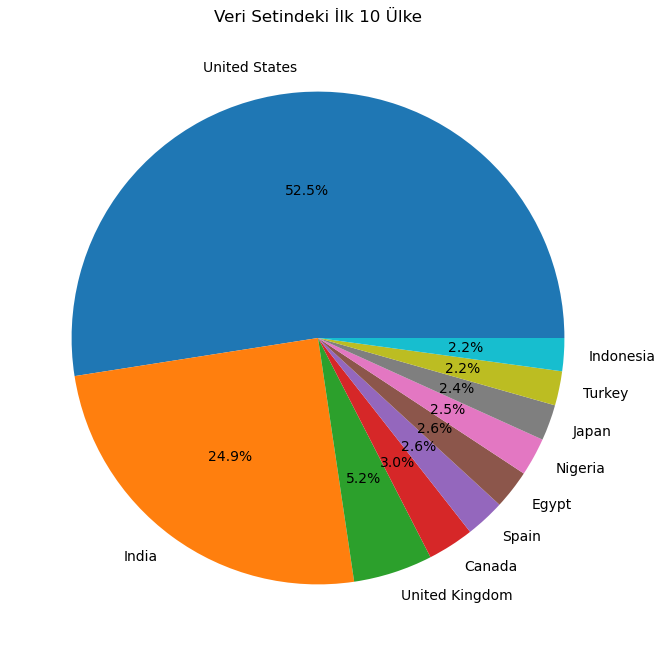

In [22]:
ülke_sayısı = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(ülke_sayısı, labels=ülke_sayısı.index, autopct='%1.1f%%')
plt.title('Veri Setindeki İlk 10 Ülke')
plt.show()

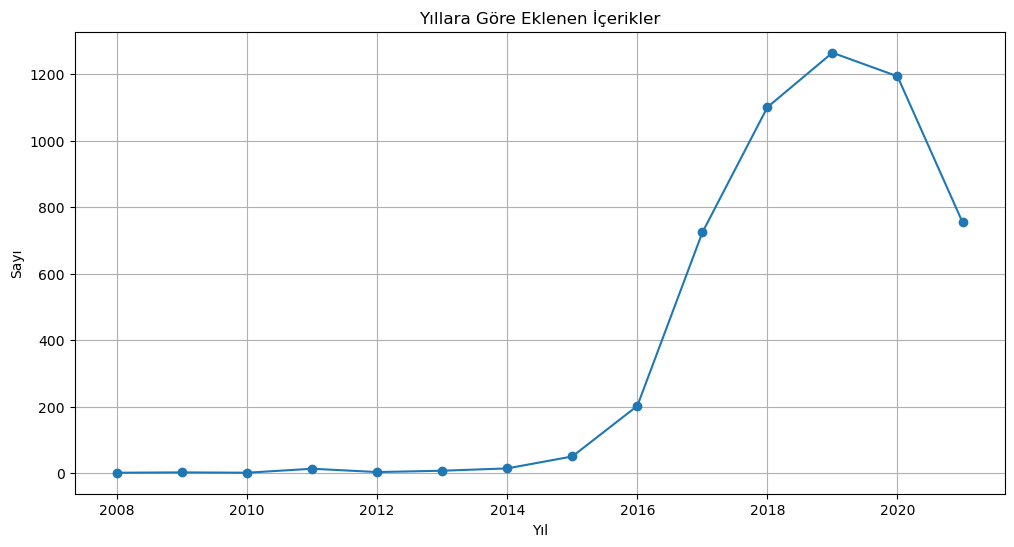

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['ekleme_yılı'] = df['date_added'].dt.year
yıl_sayısı = df['ekleme_yılı'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yıl_sayısı.index, yıl_sayısı.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Sayı')
plt.title('Yıllara Göre Eklenen İçerikler')
plt.grid()
plt.show()

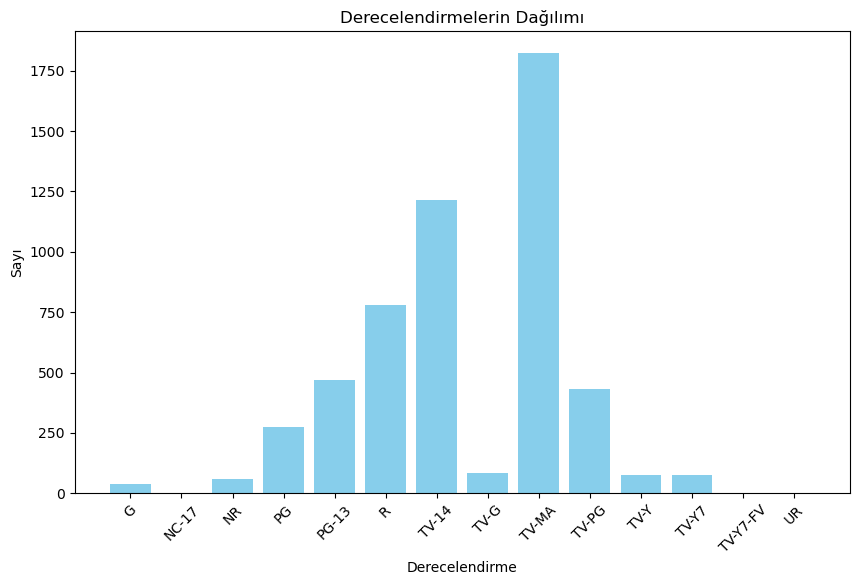

In [24]:
rating_sayısı = df['rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(rating_sayısı.index, rating_sayısı.values, color='skyblue')
plt.xlabel('Derecelendirme')
plt.ylabel('Sayı')
plt.title('Derecelendirmelerin Dağılımı')
plt.xticks(rotation=45)
plt.show()

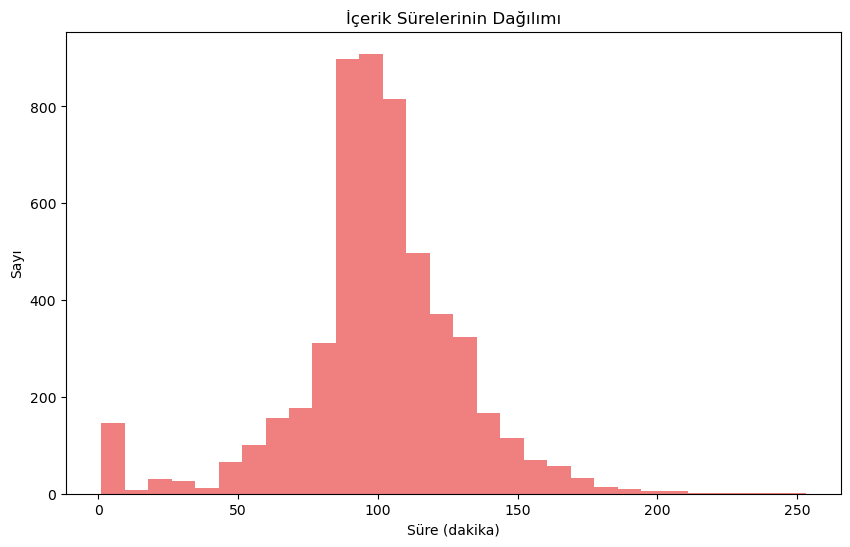

In [25]:
# Duration sütunundaki süreleri dakika cinsinden çevirmek için bir işlem yapın
df['süre_dakika'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.hist(df['süre_dakika'], bins=30, color='lightcoral')
plt.xlabel('Süre (dakika)')
plt.ylabel('Sayı')
plt.title('İçerik Sürelerinin Dağılımı')
plt.show()

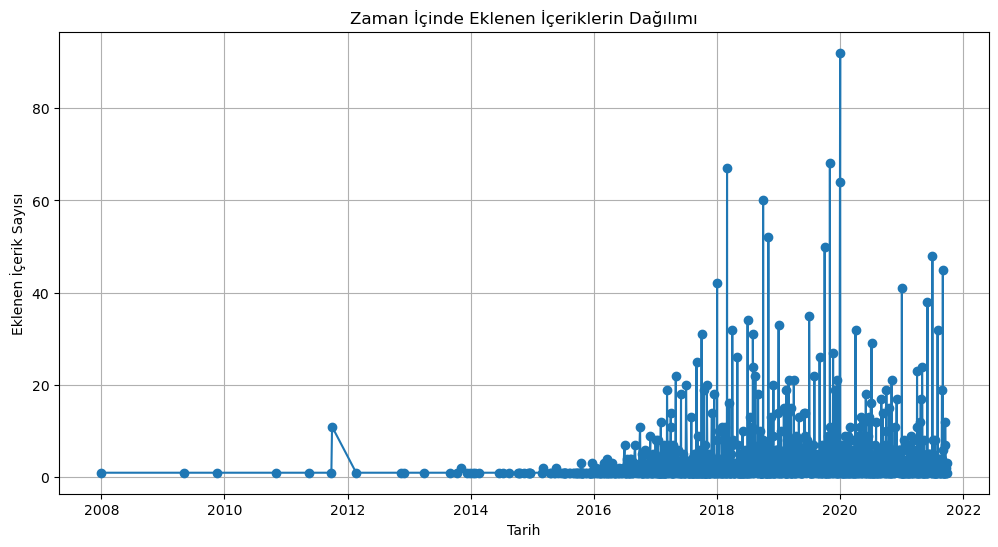

In [27]:
# Tarih sütununu zaman verilerine dönüştürün
df['date_added'] = pd.to_datetime(df['date_added'])

# Tarih sütununu gruplayın ve sayın
date_counts = df['date_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')
plt.xlabel('Tarih')
plt.ylabel('Eklenen İçerik Sayısı')
plt.title('Zaman İçinde Eklenen İçeriklerin Dağılımı')
plt.grid()
plt.show()

# Modelleme:

In [32]:
from sklearn.preprocessing import StandardScaler
import sqlite3
from sqlite3 import Error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Veri kümelemesi için genellikle benzer özelliklere sahip sütunları bir araya getirmek iyi bir başlangıç olabilir. Aşağıda, bu veri setine dayalı olarak seçebileceğiniz üç sütun önerisi bulunmaktadır:

Listed In, Type, Country: İçerikleri tanımlayan kategoriler (Listed In), içeriğin türü (Type) ve içeriğin ülkesi (Country) gibi sütunları bir araya getirebilirsiniz. Bu kombinasyon, içerikleri hem türlerine hem de coğrafi veya kültürel özelliklerine göre gruplandırmak için kullanışlı olabilir.

Rating, Duration, Release Year: İçeriğin derecesi (Rating), süresi (Duration) ve yayın yılı (Release Year) gibi sütunları bir araya getirebilirsiniz. Bu kombinasyon, içeriğin nitelikleri, uzunluğu ve yaşına göre gruplandırmayı destekleyebilir.

Type, Rating, Duration: İçeriğin türü (Type), derecesi (Rating) ve süresi (Duration) gibi sütunları bir araya getirebilirsiniz. Bu kombinasyon, içerik türüne, derecesine ve süresine göre farklı kümeler oluşturmanıza yardımcı olabilir.

Her bir kombinasyonun, içeriklerin gruplandırılmasını farklı bir şekilde etkileyeceğini unutmayın. Hangi sütun kombinasyonunun projenize daha uygun olduğunu belirlemek için deneme yapmanız ve sonuçları değerlendirmeniz gerekecektir.

In [46]:
df["duration"].value_counts()

94.0     135
93.0     130
97.0     129
95.0     127
90.0     123
        ... 
20.0       1
7.0        1
189.0      1
229.0      1
191.0      1
Name: duration, Length: 196, dtype: int64

In [48]:
# "duration" sütunundaki süreleri dakika cinsinden sayısal değerlere dönüştürün
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

AttributeError: Can only use .str accessor with string values!

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   float64       
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  ekleme_yılı   5332 non-null   int64         
 13  süre_dakika   5332 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 624.8+ KB


In [39]:
scaler = StandardScaler()
x['duration'] = scaler.fit_transform(df[['duration']])

In [42]:
x = pd.concat([x, df['duration']], axis=1)

Verileri ölçeklendirin
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'ekleme_yılı', 'süre_dakika'],
      dtype='object')

In [37]:
x = pd.get_dummies(df[["listed_in", "rating"]], columns=["listed_in", "rating"], prefix=["category", "rating"])

Bu kod, "listed_in" ve "rating" sütunlarındaki kategorik verileri "One-Hot Encoding" ile dönüştürür ve sonuç olarak sayısal bir veri çerçevesi (DataFrame) elde edersiniz. Bu sayısal veriyi daha sonra kümeleme algoritmalarına girebilirsiniz.

In [53]:
df = pd.get_dummies(df, columns=['listed_in'])

In [55]:
# listed_in sütunu için One-Hot Encoding uygulandıktan sonra x olarak tanımlama
x = df.drop(columns=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'description'])

In [56]:
model=KMeans(4)

In [57]:
model=model.fit(x)

In [58]:
tahmin=model.predict(x)

In [59]:
pred=model.predict(x)

In [60]:
pred

array([1, 0, 1, ..., 3, 3, 1])

In [61]:
#bunların birbirlerine benzerlikleri nedir diye bakarsak
silhouette_score(x,pred)

0.48445588882267315

In [62]:
x["cluster"]=tahmin

In [63]:
x.head()

,ekleme_yılı,süre_dakika,listed_in_Action & Adventure,"listed_in_Action & Adventure, Anime Features, Children & Family Movies","listed_in_Action & Adventure, Anime Features, Classic Movies","listed_in_Action & Adventure, Anime Features, Horror Movies","listed_in_Action & Adventure, Anime Features, International Movies","listed_in_Action & Adventure, Anime Features, Sci-Fi & Fantasy","listed_in_Action & Adventure, Children & Family Movies","listed_in_Action & Adventure, Children & Family Movies, Classic Movies","listed_in_Action & Adventure, Children & Family Movies, Comedies","listed_in_Action & Adventure, Children & Family Movies, Cult Movies","listed_in_Action & Adventure, Children & Family Movies, Dramas","listed_in_Action & Adventure, Children & Family Movies, Independent Movies","listed_in_Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy","listed_in_Action & Adventure, Classic Movies","listed_in_Action & Adventure, Classic Movies, Comedies","listed_in_Action & Adventure, Classic Movies, Cult Movies","listed_in_Action & Adventure, Classic Movies, Dramas","listed_in_Action & Adventure, Classic Movies, International Movies","listed_in_Action & Adventure, Classic Movies, Sci-Fi & Fantasy","listed_in_Action & Adventure, Comedies","listed_in_Action & Adventure, Comedies, Cult Movies","listed_in_Action & Adventure, Comedies, Dramas","listed_in_Action & Adventure, Comedies, Horror Movies","listed_in_Action & Adventure, Comedies, Independent Movies","listed_in_Action & Adventure, Comedies, International Movies","listed_in_Action & Adventure, Comedies, Music & Musicals","listed_in_Action & Adventure, Comedies, Romantic Movies","listed_in_Action & Adventure, Comedies, Sci-Fi & Fantasy","listed_in_Action & Adventure, Comedies, Sports Movies","listed_in_Action & Adventure, Cult Movies","listed_in_Action & Adventure, Cult Movies, Dramas","listed_in_Action & Adventure, Cult Movies, International Movies","listed_in_Action & Adventure, Cult Movies, Sci-Fi & Fantasy","listed_in_Action & Adventure, Documentaries, International Movies","listed_in_Action & Adventure, Documentaries, Sports Movies","listed_in_Action & Adventure, Dramas","listed_in_Action & Adventure, Dramas, Faith & Spirituality","listed_in_Action & Adventure, Dramas, Independent Movies","listed_in_Action & Adventure, Dramas, International Movies","listed_in_Action & Adventure, Dramas, Romantic Movies","listed_in_Action & Adventure, Dramas, Sci-Fi & Fantasy","listed_in_Action & Adventure, Dramas, Sports Movies","listed_in_Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","listed_in_Action & Adventure, Horror Movies","listed_in_Action & Adventure, Horror Movies, Independent Movies","listed_in_Action & Adventure, Horror Movies, International Movies","listed_in_Action & Adventure, Horror Movies, Sci-Fi & Fantasy","listed_in_Action & Adventure, Horror Movies, Thrillers",...,"listed_in_International Movies, Romantic Movies","listed_in_International Movies, Romantic Movies, Sci-Fi & Fantasy","listed_in_International Movies, Romantic Movies, Thrillers","listed_in_International Movies, Sci-Fi & Fantasy","listed_in_International Movies, Sci-Fi & Fantasy, Thrillers","listed_in_International Movies, Sports Movies","listed_in_International Movies, Thrillers","listed_in_International TV Shows, Korean TV Shows, Romantic TV Shows","listed_in_International TV Shows, Korean TV Shows, Stand-Up Comedy & Talk Shows","listed_in_International TV Shows, Korean TV Shows, TV Action & Adventure","listed_in_International TV Shows, Korean TV Shows, TV Dramas","listed_in_International TV Shows, Reality TV","listed_in_International TV Shows, Romantic TV Shows, Spanish-Language TV Shows","listed_in_International TV Shows, Romantic TV Shows, TV Comedies","listed_in_International TV Shows, Romantic TV Shows, TV Dramas","listed_in_International TV Shows, Romantic TV Shows, TV Mysteries","listed_in_International TV Shows, Spanish-Language TV Shows, TV Comedies","listed_in_International TV

In [65]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [66]:
 clust(10)

Cluster  2  score:  0.4681109798204298
Cluster  3  score:  0.5637721459757049
Cluster  4  score:  0.49351137674028767
Cluster  5  score:  0.5359003713656801
Cluster  6  score:  0.5137111791497017
Cluster  7  score:  0.4975409468804754
Cluster  8  score:  0.48238143266529704
Cluster  9  score:  0.4896393112062911
Cluster  10  score:  0.48185197934752283


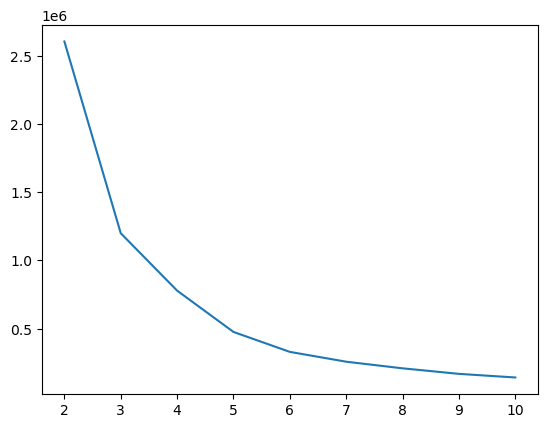

In [67]:
plt.plot(allcluster,distances);

In [68]:
from yellowbrick.cluster import KElbowVisualizer

In [69]:
model=KMeans()

In [70]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

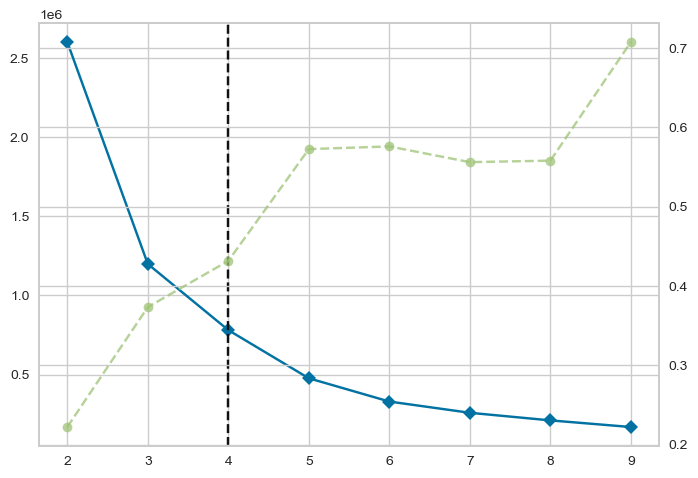

In [71]:
visualizer.fit(x)

In [72]:
# Bu Prorjeye göre anlıyoruz ki film yada show içerikeriklerini benzerliklerine göre 4 gruba yani 4 kümelemeye ayırabiliriz.